In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
print("Original Data (First 5 Rows):\n", df.head())

Original Data (First 5 Rows):
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Selecting numerical and categorical columns
num_cols = ['age', 'fare', 'sibsp', 'parch']
cat_cols = ['sex', 'class', 'embark_town', 'who']

# Handling missing values

In [4]:

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
print("\nNumerical Data After Imputation (First 5 Rows):\n", df[num_cols].head())



Numerical Data After Imputation (First 5 Rows):
     age     fare  sibsp  parch
0  22.0   7.2500    1.0    0.0
1  38.0  71.2833    1.0    0.0
2  26.0   7.9250    0.0    0.0
3  35.0  53.1000    1.0    0.0
4  35.0   8.0500    0.0    0.0


In [5]:

# Encoding categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))
print("\nCategorical Data After Encoding (First 5 Rows):\n", df[cat_cols].head())



Categorical Data After Encoding (First 5 Rows):
    sex  class  embark_town  who
0    1      2            2    1
1    0      0            0    2
2    0      2            2    2
3    0      0            2    2
4    1      2            2    1


In [6]:

# Selecting final feature set
X = df[num_cols + cat_cols]
print("\nFinal Feature Set Before Scaling (First 5 Rows):\n", X.head())


Final Feature Set Before Scaling (First 5 Rows):
     age     fare  sibsp  parch  sex  class  embark_town  who
0  22.0   7.2500    1.0    0.0    1      2            2    1
1  38.0  71.2833    1.0    0.0    0      0            0    2
2  26.0   7.9250    0.0    0.0    0      2            2    2
3  35.0  53.1000    1.0    0.0    0      0            2    2
4  35.0   8.0500    0.0    0.0    1      2            2    1


In [7]:

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData After Standardization (First 5 Rows):\n", X_scaled[:5])



Data After Standardization (First 5 Rows):
 [[-0.5924806  -0.50244517  0.43279337 -0.47367361  0.73769513  0.82737724
   0.58111394 -0.3552422 ]
 [ 0.63878901  0.78684529  0.43279337 -0.47367361 -1.35557354 -1.56610693
  -1.93846038  1.32837909]
 [-0.2846632  -0.48885426 -0.4745452  -0.47367361 -1.35557354  0.82737724
   0.58111394  1.32837909]
 [ 0.40792596  0.42073024  0.43279337 -0.47367361 -1.35557354 -1.56610693
   0.58111394  1.32837909]
 [ 0.40792596 -0.48633742 -0.4745452  -0.47367361  0.73769513  0.82737724
   0.58111394 -0.3552422 ]]


In [8]:

# Applying PCA (Reducing to 2 dimensions for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\nPCA Transformed Data (First 5 Rows):\n", X_pca[:5])


PCA Transformed Data (First 5 Rows):
 [[-1.4701766   0.0515085 ]
 [ 2.90868388 -0.10756235]
 [ 0.37452121 -0.2127844 ]
 [ 2.10362788 -0.02542022]
 [-1.12815647 -0.89494528]]


In [9]:

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))



Explained Variance Ratio: [0.2649219  0.21788697]
Cumulative Explained Variance: [0.2649219  0.48280887]


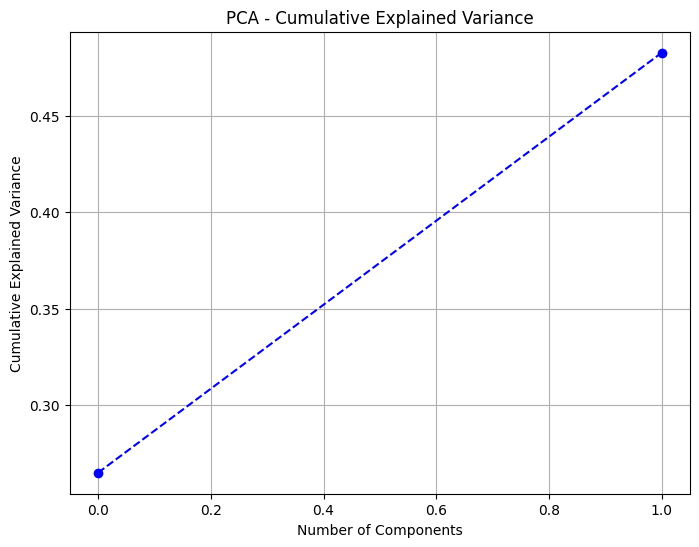

In [10]:


# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

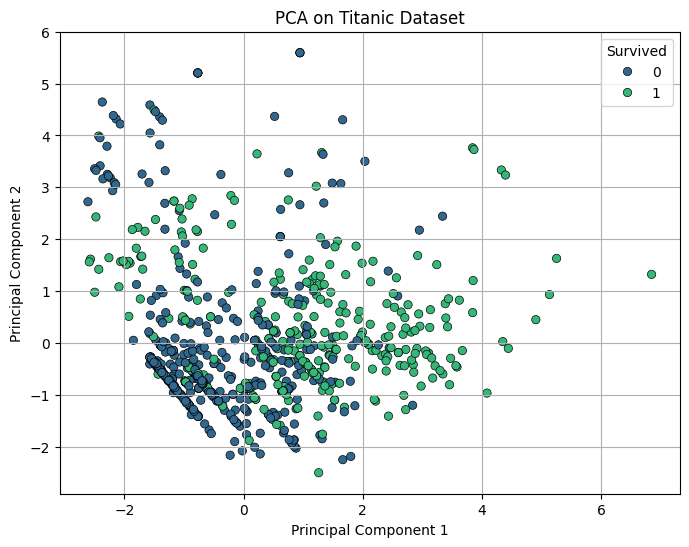

In [11]:
# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['survived'], palette='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Titanic Dataset')
plt.legend(title='Survived')
plt.grid()
plt.show()


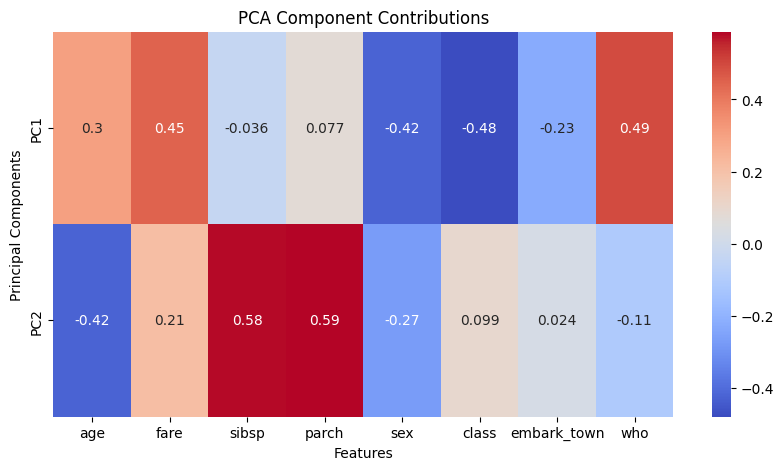

In [12]:


# Feature contribution in principal components
components = pca.components_
plt.figure(figsize=(10, 5))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=num_cols + cat_cols, yticklabels=["PC1", "PC2"])
plt.title('PCA Component Contributions')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


In [13]:
# Final PCA Summary
def print_pca_summary():
    print("\nFinal PCA Analysis Summary:")
    print("Original Features:", num_cols + cat_cols)
    print("Reduced to 2 Principal Components")
    print("Explained Variance Ratio:", explained_variance)
    print("Cumulative Variance Explained:", np.cumsum(explained_variance))
print_pca_summary()


Final PCA Analysis Summary:
Original Features: ['age', 'fare', 'sibsp', 'parch', 'sex', 'class', 'embark_town', 'who']
Reduced to 2 Principal Components
Explained Variance Ratio: [0.2649219  0.21788697]
Cumulative Variance Explained: [0.2649219  0.48280887]
